In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif col != 't_dat':
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

# Helper functions
# https://libguides.usc.edu/busdem/age
def gen_label(age):
    if 10.0 < age <= 29.0:
        return 'Gen Z'
    elif 29.0 < age <= 44.0:
        return 'Millenial'
    elif 44.0 < age <= 59.0:
        return 'Gen X'
    elif 59.0 < age <= 74.0:
        return 'Baby Boomers'
    elif 74.0 < age <= 89.0:
        return 'Other'

# Step 1 - EDA

In [3]:
input_path_prefix = "../../../DSCI-599/Final-Project/Data/"

print('-' * 80)
print('articles')
pre_articles = import_data(input_path_prefix + "articles.csv")
#pre_articles = pd.read_csv('Data/articles.csv')
print('-' * 80)
print('customers\'s memory usage will be better off without the memory optimization')
pre_customers = pd.read_csv(input_path_prefix + "customers.csv")
#pre_customers = pd.read_csv('Data/customers.csv')
print('-' * 80)
print('transactions')
pre_transactions = import_data(input_path_prefix + "transactions_train.csv")
#pre_transactions = pd.read_csv('Data/transactions_train.csv')

--------------------------------------------------------------------------------
articles
Memory usage of dataframe is 20.13 MB
Memory usage after optimization is: 7.25 MB
Decreased by 64.0%
--------------------------------------------------------------------------------
customers's memory usage will be better off without the memory optimization
--------------------------------------------------------------------------------
transactions
Memory usage of dataframe is 1212.63 MB
Memory usage after optimization is: 618.64 MB
Decreased by 49.0%


# Step 1.1 - Articles

# Step 1.2 - Customers

**There are no duplicates in customers.**

In [4]:
pre_customers.shape[0] - pre_customers['customer_id'].nunique()

0

**Here we have an abnormal number of customers by one postal code. This postal code has 120303 customer_ids associated with it, which means it might be an enncoded NaN address, a huge distribution center, or pickup address.**

In [5]:
pre_customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False).head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


**Age and club_member_status are different, like customer_ids.**

In [6]:
pre_customers[pre_customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


**The most common age is about 21-23.**

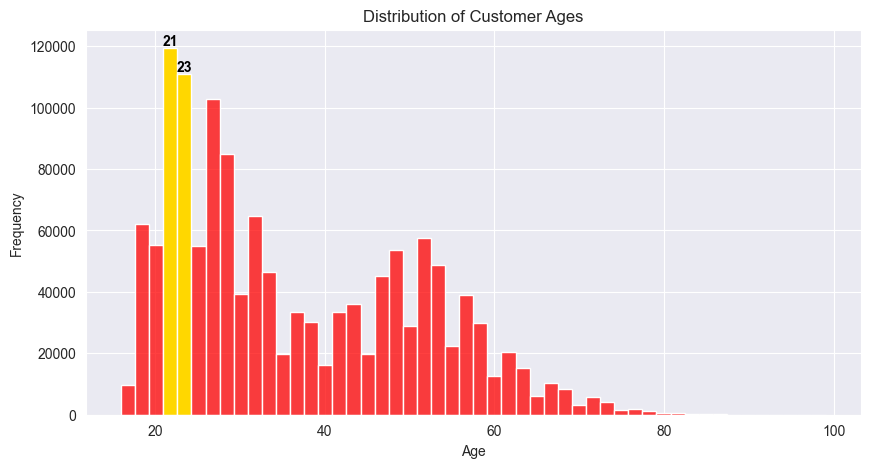

In [7]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=pre_customers, x='age', bins=50, color='red')

heights = [p.get_height() for p in ax.patches]
sec_highest = sorted(heights)[-2]
for p in ax.patches:
    if p.get_height() >= sec_highest:
        p.set_color('gold')
        p.set_edgecolor('white')

        bar_midpoint = p.get_x() + p.get_width() / 2
        ax.text(bar_midpoint, p.get_height() + 1,
                f'{int(bar_midpoint)}',
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Customer Ages')
plt.show()

**Customers are assigned a generation label (age_group) according to their age group.**

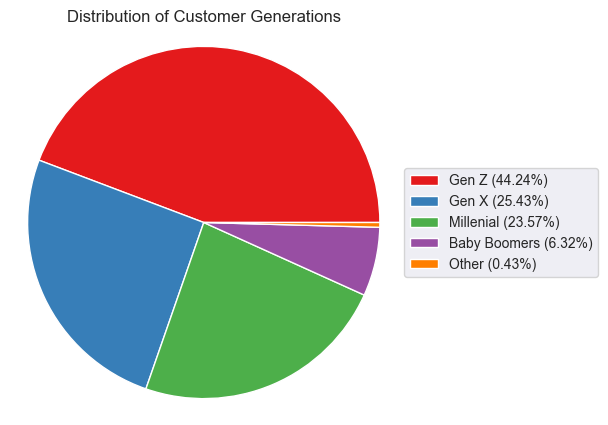

In [18]:
# Add gen label (age_group)
pre_customers['age_group'] = pre_customers['age'].apply(gen_label)
pre_customers_gen_counts = pre_customers['age_group'].value_counts()
gen_counts_dict = dict(pre_customers_gen_counts)

plt.figure(figsize=(5,5))
plt.pie(pre_customers_gen_counts, colors=sns.color_palette('Set1'))
plt.title('Distribution of Customer Generations')
plt.axis('equal')

gen_percentages = [f'{gen_counts_dict[key]/sum(gen_counts_dict.values())*100:.2f}%' for key in gen_counts_dict.keys()]

plt.legend(labels=[f'{label} ({percent})' for label, percent in zip(gen_counts_dict.keys(), gen_percentages)], loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

**Here we have three types for NO DATA. We'll unite these values.**

In [19]:
pre_customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [20]:
pre_customers.loc[~pre_customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
pre_customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

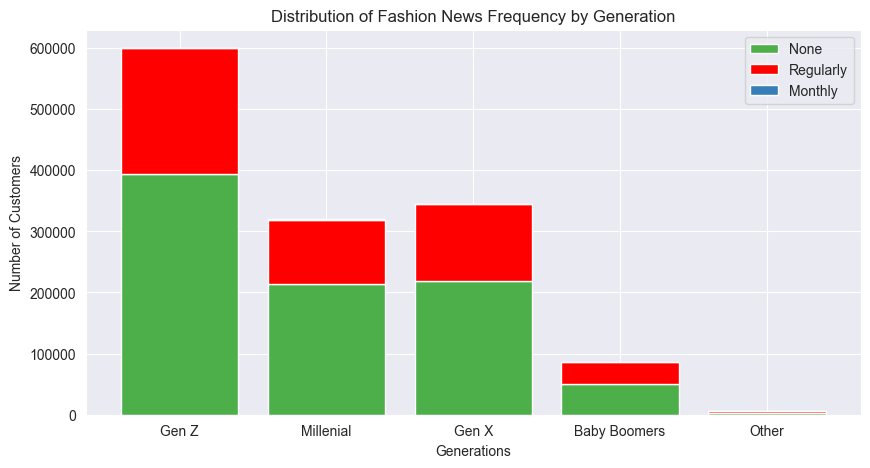

In [24]:
age_group_order = ['Gen Z', 'Millenial', 'Gen X', 'Baby Boomers', 'Other']

fashion_news_data = pre_customers.groupby(['age_group', 'fashion_news_frequency']).size().reset_index(name='customer_count')

fashion_news_data['age_group'] = pd.Categorical(
    fashion_news_data['age_group'],
    categories=age_group_order,
    ordered=True
)

fashion_news_data['fashion_news_frequency'] = pd.Categorical(
    fashion_news_data['fashion_news_frequency'],
    categories=['None', 'Regularly', 'Monthly'],
    ordered=True
)

stacked_news_data = fashion_news_data.pivot(index='age_group', columns='fashion_news_frequency', values='customer_count').fillna(0)

news_colors = {'Regularly':'red',
          'Monthly':sns.color_palette('Set1')[1],
          'None':sns.color_palette('Set1')[2]}

f, ax = plt.subplots(figsize=(10,5))
bottom = None
for category in ['None', 'Regularly', 'Monthly']:  # Ensure stacking follows the order
    ax.bar(
        stacked_news_data.index, 
        stacked_news_data[category], 
        label=category, 
        color=news_colors[category], 
        bottom=bottom
    )
    bottom = stacked_news_data[category] if bottom is None else bottom + stacked_news_data[category]

ax.set_xlabel('Generations')
ax.set_ylabel('Number of Customers')
ax.set_title('Distribution of Fashion News Frequency by Generation')
plt.legend(loc='upper right')
plt.show()

**Status in H&M club. Most customers have an active club status, while some of them begin to activate it (pre-create). A tiny segment of customers have abandoned the club.**

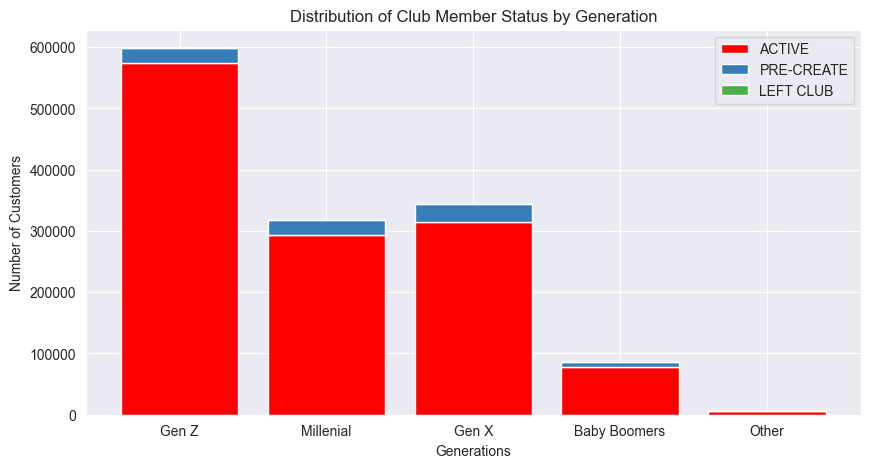

In [28]:
club_status_data = pre_customers.groupby(['age_group', 'club_member_status']).size().reset_index(name='customer_count')

club_status_data['age_group'] = pd.Categorical(
    club_status_data['age_group'],
    categories=age_group_order,
    ordered=True
)

club_status_data['club_member_status'] = pd.Categorical(
    club_status_data['club_member_status'],
    categories=['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'],
    ordered=True
)

stacked_club_data = club_status_data.pivot(index='age_group', columns='club_member_status', values='customer_count').fillna(0)

club_colors = {'ACTIVE':'red',
          'PRE-CREATE':sns.color_palette('Set1')[1],
          'LEFT CLUB':sns.color_palette('Set1')[2]}

f, ax = plt.subplots(figsize=(10,5))
bottom = None
for category in ['ACTIVE', 'PRE-CREATE', 'LEFT CLUB']:  # Ensure stacking follows the order
    ax.bar(
        stacked_club_data.index, 
        stacked_club_data[category], 
        label=category, 
        color=club_colors[category], 
        bottom=bottom
    )
    bottom = stacked_club_data[category] if bottom is None else bottom + stacked_club_data[category]

ax.set_xlabel('Generations')
ax.set_ylabel('Number of Customers')
ax.set_title('Distribution of Club Member Status by Generation')
plt.legend(loc='upper right')
plt.show()

# Step 1.3 - Transactions

In [15]:
# Price scaling - ref: https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/310496
pre_transactions['price'] = pre_transactions['price'] * 590
pd.option_context('mode.use_inf_as_na', True)